In [1]:
import pandas as pd              
import numpy as np               
import seaborn as sns            
import matplotlib.pyplot as plt  
from matplotlib import rcParams
import scipy

In [2]:
data = pd.read_csv("movies.csv")

In [3]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
data.shape

(9999, 9)

Conversion VOTES en float

In [5]:
A=[]
for i in data["VOTES"]:
    new_i=str(i).replace(',','')
    A.append(new_i)
data["VOTES1"]=A
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,VOTES1
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,21062
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,17870
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,885805
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,414849
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,nan


In [6]:
data['VOTES1']=data['VOTES1'].astype(float)

In [7]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,VOTES1
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,21062.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,17870.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,885805.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,414849.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,NaN


1. Box plot

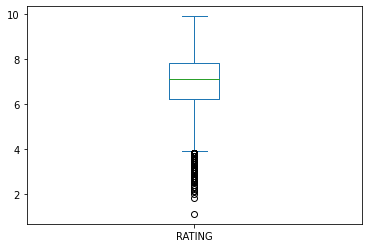

In [8]:
data["RATING"].plot(kind='box')


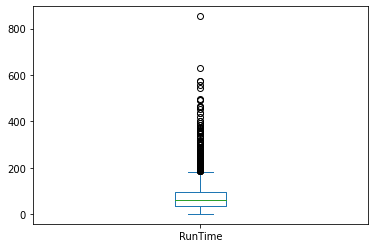

In [9]:
data["RunTime"].plot(kind='box')

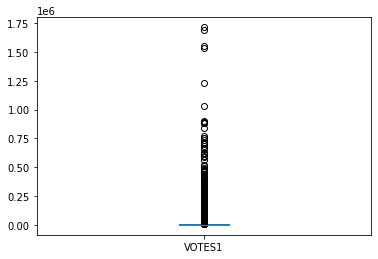

In [10]:
data["VOTES1"].plot(kind='box')

2. 3. Outliers et remplacement par moyenne

In [11]:
# RATING
q1=data["RATING"].quantile(q=0.25)
q3=data["RATING"].quantile(q=0.75)
IQR=q3-q1
borne_inf=q1-1.5*IQR
borne_inf

3.8000000000000007

In [12]:
outliers=(data["RATING"]<borne_inf).sum()
outliers

165

In [13]:
outliers/data.shape[0]*100 

1.65016501650165

In [14]:
# Nombre valeurs manquantes RATING

data["RATING"].isna().sum()


1820

In [15]:
# Nombre de valeurs manquantes RunTime

data["RunTime"].isna().sum()

2958

In [16]:
mean = data['RATING'].mean()
data['RATING'].fillna(mean, inplace=True)

In [17]:
# RunTime
q1=data["RunTime"].quantile(q=0.25)
q3=data["RunTime"].quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

183.5

In [18]:
outliers=(data["RunTime"]>borne_sup).sum()
outliers

105

In [19]:
outliers/data.shape[0]*100 

1.05010501050105

In [20]:
mean = data['RunTime'].mean()
data['RunTime'].fillna(mean, inplace=True)

In [21]:
data["VOTES1"].isna().sum()

1820

In [22]:
mean = data['VOTES1'].mean()
data['VOTES1'].fillna(mean, inplace=True)

5. PCA

In [23]:
data_quanti=data.select_dtypes(include="float64")

In [24]:
data_quanti

,RATING,RunTime,VOTES1
0,6.100000,121.000000,21062.000000
1,5.000000,25.000000,17870.000000
2,8.200000,44.000000,885805.000000
3,9.200000,23.000000,414849.000000
4,6.921176,68.688539,15124.062722
...,...,...,...
9994,6.921176,68.688539,15124.062722
9995,6.921176,68.688539,15124.062722
9996,6.921176,68.688539,15124.062722
9997,6.921176,68.688539,15124.062722


In [25]:
X=data_quanti

In [26]:
# SEM: Standart Error of Mean
X.sem()

RATING       0.011036
RunTime      0.396577
VOTES1     633.614667
dtype: float64

In [27]:
# Standardisation

XX=(X-X.mean())/X.std()

In [28]:
XX.head()

,RATING,RunTime,VOTES1
0,-0.744092,1.319141e+00,0.093720
1,-1.740835,-1.101696e+00,0.043340
2,1.158781,-6.225723e-01,13.742177
3,2.064910,-1.152130e+00,6.308959
4,0.000000,-3.583559e-16,0.000000


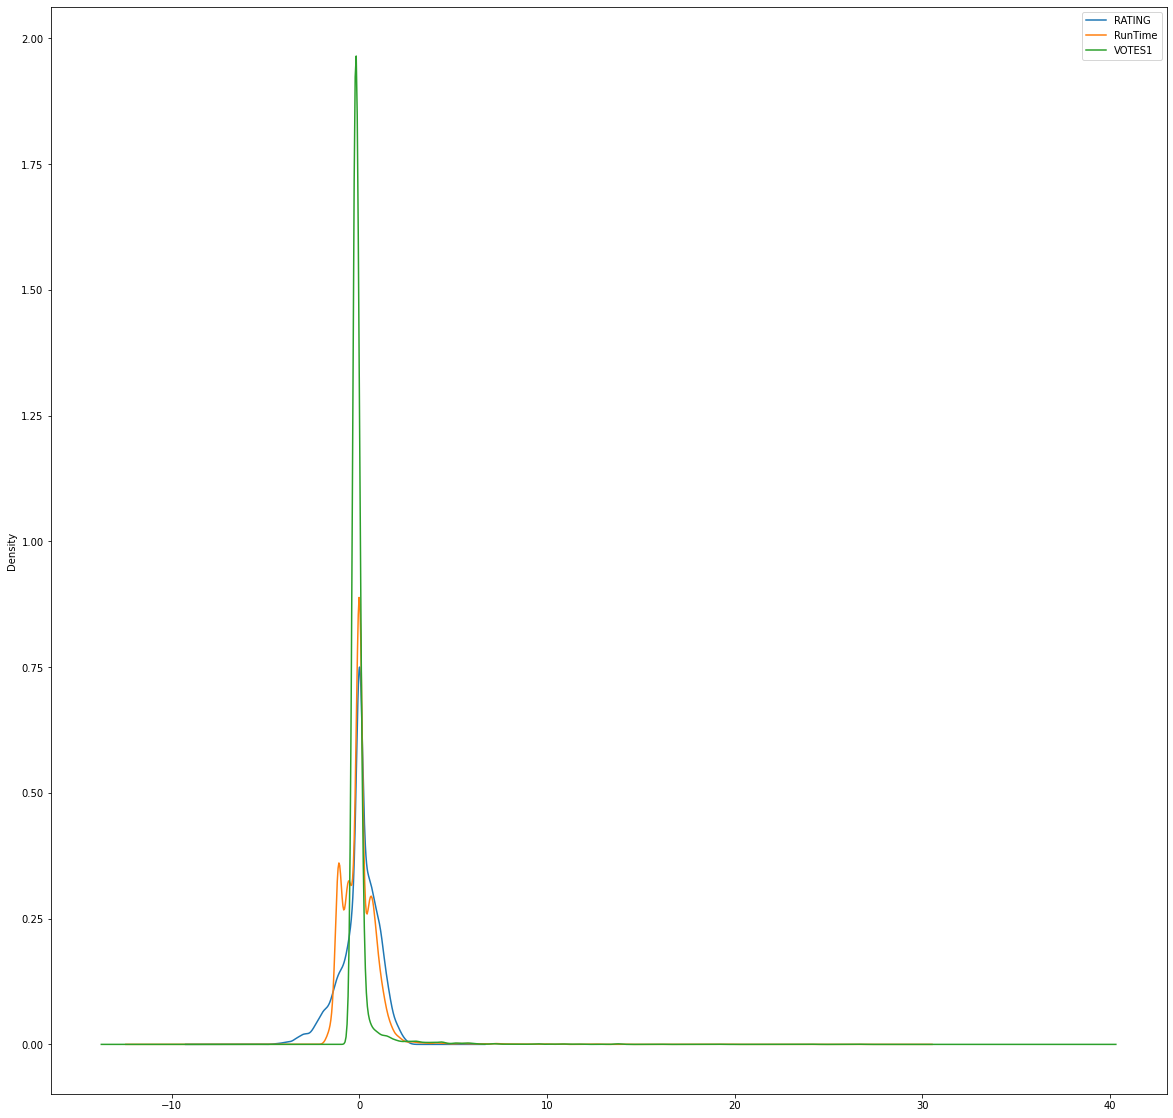

In [29]:
XX.plot(kind='density', subplots=False, layout=(5,7), sharex=True, sharey=True, figsize=(20,20))
plt.show()

In [30]:
XX.mean()

RATING     1.932870e-16
RunTime   -3.979437e-16
VOTES1    -1.705473e-17
dtype: float64

In [31]:
erreur_type2= np.std(XX)/np.sqrt(XX.shape[0])
erreur_type2

RATING     0.01
RunTime    0.01
VOTES1     0.01
dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.decomposition import PCA

In [33]:
#Centrage et réduction

X_scaled = scaler.fit_transform(X)  # STANDARDISATION

In [34]:
X_scaled.shape

(9999, 3)

In [35]:
X_scaled

array([[-7.44129525e-01,  1.31920702e+00,  9.37246479e-02],
       [-1.74092229e+00, -1.10175142e+00,  4.33419877e-02],
       [ 1.15883848e+00, -6.22603395e-01,  1.37428640e+01],
       ...,
       [ 0.00000000e+00, -3.58373841e-16,  0.00000000e+00],
       [ 0.00000000e+00, -3.58373841e-16,  0.00000000e+00],
       [ 0.00000000e+00, -3.58373841e-16,  0.00000000e+00]])

In [36]:
#Machinelearnia

In [37]:
model = PCA(n_components = 3)
X_reduced = model.fit_transform(X_scaled)

In [38]:
print(model.explained_variance_ratio_)

# 40 % des valeurs sont utiles dans la 1ere colonne
# 36 % des valeurs sont utiles dans la 2eme colonne
# 23 % des valeurs sont utiles dans la 3eme colonne

# Pour préserver 90% de nos données, nous devons prendre les 3 colonnes

[0.40371668 0.36455289 0.23173043]


In [39]:
np.cumsum(model.explained_variance_ratio_)

array([0.40371668, 0.76826957, 1.        ])

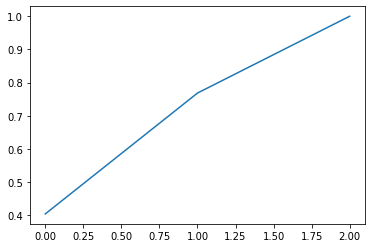

In [40]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [41]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > 90)

0

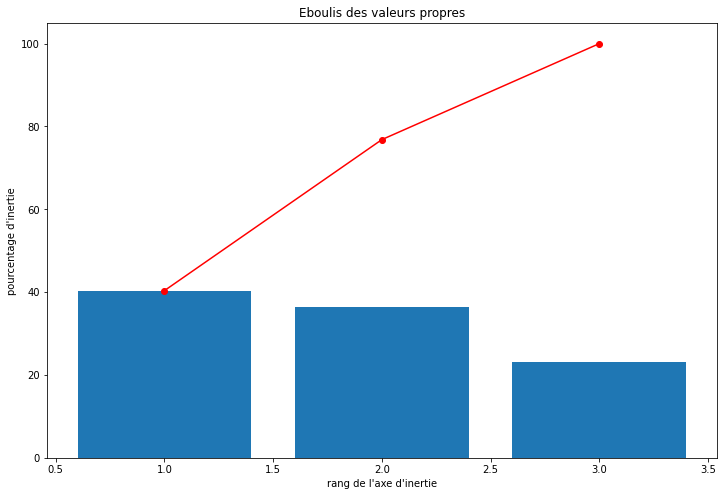

In [42]:
#Variances expliquées
varexpl = model.explained_variance_ratio_*100

#Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

6. One hot encoding

In [43]:
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,VOTES1
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.000000,NaN,21062.000000
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.000000,NaN,17870.000000
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.000000,NaN,885805.000000
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.000000,NaN,414849.000000
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,68.688539,NaN,15124.062722


# One hot encoding

In [44]:
# GENRE
one_hot_genre = pd.get_dummies(data['GENRE'])
one_hot_genre

,\nAction,"\nAction, Adventure","\nAction, Adventure, Biography","\nAction, Adventure, Comedy","\nAction, Adventure, Crime","\nAction, Adventure, Drama","\nAction, Adventure, Family","\nAction, Adventure, Fantasy","\nAction, Adventure, Horror","\nAction, Adventure, Mystery",...,"\nShort, Mystery, Sci-Fi","\nShort, Reality-TV","\nShort, Sci-Fi",\nSport,\nTalk-Show,"\nTalk-Show, Sport",\nThriller,"\nThriller, Mystery",\nWar,\nWestern
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# YEAR
one_hot_year = pd.get_dummies(data['YEAR'])
one_hot_year

,(1932),(1933),(1938),(1941),(1944),(1945),(1946),(1947),(1948),(1950),...,(VI) (2019),(VII),(VIII),(Video),(XI),(XII),(XIII),(XIV) (2017),(XLI),(XXIII)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Task 2 MIN MAX normalize

In [46]:
df1=data.select_dtypes(exclude=['object'])
df1.head()

,RATING,RunTime,VOTES1
0,6.100000,121.000000,21062.000000
1,5.000000,25.000000,17870.000000
2,8.200000,44.000000,885805.000000
3,9.200000,23.000000,414849.000000
4,6.921176,68.688539,15124.062722


In [47]:
X1 = df1['RATING']
X2 = df1['RunTime']
X3 = df1['VOTES1']

1ère méthode

In [48]:
from sklearn import preprocessing
normalized1= preprocessing.normalize([X1])
print(normalized1)

[[0.00870403 0.00713445 0.0117005  ... 0.00987576 0.00987576 0.00987576]]


In [49]:
normalized2 = preprocessing.normalize([X2])
print(normalized2)

[[0.0152568  0.00315223 0.00554793 ... 0.00866089 0.00866089 0.00866089]]


In [50]:
normalized3 = preprocessing.normalize([X3])
print(normalized3)

[[0.00323374 0.00274366 0.13600137 ... 0.00232206 0.00232206 0.00232206]]


2ème méthode

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
minmax_scale1= MinMaxScaler().fit_transform([X1])

In [53]:
minmax_scale1.min()

0.0

In [54]:
minmax_scale1.max()

0.0

In [55]:
minmax_scale2= MinMaxScaler().fit_transform([X2])

In [56]:
minmax_scale3= MinMaxScaler().fit_transform([X3])

In [57]:
minmax_scaledf1= MinMaxScaler().fit_transform(df1)

In [58]:
print(minmax_scaledf1)

[[0.56818182 0.14084507 0.0122923 ]
 [0.44318182 0.02816901 0.01042893]
 [0.80681818 0.05046948 0.51709755]
 ...
 [0.66149729 0.07944664 0.00882595]
 [0.66149729 0.07944664 0.00882595]
 [0.66149729 0.07944664 0.00882595]]


In [59]:
minmax_scaledf1.max()

1.0

In [60]:
minmax_scaledf1.min()

0.0

In [61]:
df1.head()

,RATING,RunTime,VOTES1
0,6.100000,121.000000,21062.000000
1,5.000000,25.000000,17870.000000
2,8.200000,44.000000,885805.000000
3,9.200000,23.000000,414849.000000
4,6.921176,68.688539,15124.062722


3. Modèle Lasso

In [62]:
from sklearn.linear_model import Lasso

# OLS

In [63]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [64]:
X=df1[["RunTime","VOTES1"]]
y=df1["RATING"]

In [65]:
model = linear_model.LinearRegression()
results = model.fit(X, y)

In [66]:
print(results.intercept_, results.coef_)

7.31581517766586 [-6.26417475e-03  2.35637834e-06]


In [67]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 RATING   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                          1.191e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:41:21   Log-Likelihood:                         -27565.
No. Observations:                9999   AIC:                                  5.513e+04
Df Residuals:                    9997   BIC:                                  5.515e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#   Linear Regression

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [69]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 RATING   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              8055.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):                        0.00
Time:                        15:41:21   Log-Likelihood:                         -19386.
No. Observations:                6999   AIC:                                  3.878e+04
Df Residuals:                    6997   BIC:                                  3.879e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [71]:
from sklearn.metrics import *

In [72]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE', mean_squared_error(y_test, y_pred))

MAE: 0.7431773808581841
RMSE: 1.057958320227921
MSE 1.1192758073394842


In [73]:
model.score(X,y)

0.06030347600276853

# Modèle de Lasso

In [74]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [75]:
from sklearn.model_selection import GridSearchCV

# Optimal alpha for Lasso regression

In [76]:
lassocv=LassoCV()
lassocv.fit(X_train,y_train)
lassocv.alpha_

7.878037445923938

In [77]:
alpha_lasso_opt=lassocv.alpha_

In [78]:
lasso=Lasso(alpha=alpha_lasso_opt)

In [79]:
lasso.fit(X_train,y_train)

Lasso(alpha=7.878037445923938)

In [80]:
y_pred=lasso.predict(X_test)

In [81]:
y_pred

array([6.89992409, 6.89861671, 6.95481242, ..., 6.94664824, 6.95978827,
       6.9279373 ])

In [82]:
print("Slope: %.2f" % lasso.coef_[0])    # 2f -> Arrondir à la décimale supérieure    1f -> Arrondir 

Slope: -0.00


In [83]:
print("Intercept: %.2f" % lasso.intercept_)

Intercept: 6.98


In [84]:
mean_squared_error(y_test,y_pred)

1.157687592042462

In [85]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1.0759589174510624

In [86]:
mean_absolute_error(y_test,y_pred)

0.7587737076696894

In [87]:
print("Rsquared: %.2f" % lasso.score(X_test,y_test))

Rsquared: 0.02


# Ridge

In [88]:
ridgecv=RidgeCV()
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

10.0

In [89]:
alpha_ridge_opt= ridgecv.alpha_

In [90]:
ridge=Ridge(alpha=alpha_ridge_opt)

In [91]:
ridge.fit(X_train,y_train)

Ridge(alpha=10.0)

In [92]:
y_pred=ridge.predict(X_test)

In [93]:
y_pred

array([6.8937313 , 6.89213991, 7.16861768, ..., 7.0469335 , 7.17467446,
       6.92782994])

In [94]:
print("Slope: %.2f" % ridge.coef_[0])

Slope: -0.01


In [95]:
print("Intercept: %.2f" % ridge.intercept_)

Intercept: 7.32


In [96]:
mean_squared_error(y_test,y_pred)

1.1192758121152206

In [97]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1.0579583224849742

In [98]:
mean_absolute_error(y_test,y_pred)

0.7431773890410599

In [99]:
print("Rsquared: %.2f" % ridge.score(X_test,y_test))

Rsquared: 0.06


Linear regression:
RMSE : 1,09
MAE : 0,77
R2 : 0,06

Lasso:
alpha : 7,04
RMSE : 1,11
MAE : 0,77
R2 : 0,06

Ridge:
alpha : 10
RMSE : 1,09
MAE : 0,77
R2 : 0,05

Les erreurs sont plus petites avec le modèle Ridge, donc il sera le plus approprié.

Les R2 sont de 5% alors la droite de régression colle à 5% avec l’ensemble des points donnés.

# AIC BIC

# Avec Lasso

In [100]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline

In [101]:
start_time = time.time()
lasso_lars_ic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion="aic", normalize=False)
).fit(X, y)
fit_time = time.time() - start_time

In [102]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [103]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

In [104]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
0.2272760872909735,30365.775881,30365.775881
0.1281669341309566,30060.046661,30067.256901
0.0,29727.760975,29742.181456


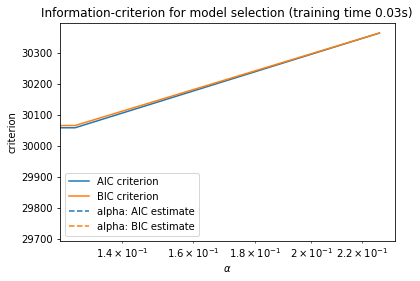

In [105]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

# Avec Ridge

In [106]:
start_time = time.time()
ridge_lars_ic = make_pipeline(
    StandardScaler(), RidgeLarsIC(criterion="aic", normalize=False)
).fit(X, y)
fit_time = time.time() - start_time

NameError: ignored

In [ ]:
results = pd.DataFrame(
    {
        "alphas": ridge_lars_ic[-1].alphas_,
        "AIC criterion": ridge_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = ridge_lars_ic[-1].alpha_

In [ ]:
ridge_lars_ic.set_params(ridgelarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = ridge_lars_ic[-1].criterion_
alpha_bic = ridge_lars_ic[-1].alpha_

In [ ]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

In [ ]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

# Cross Validation

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Kfold

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [112]:
cv = KFold(5, random_state=None)    # nombre de split (5 le plus souvent)
cross_val_score(Lasso(), X,y, cv=cv)

array([-0.40990243, -0.0896418 , -0.23529147, -0.29935294, -0.26298465])

In [ ]:
cv = LeaveOneOut()   
cross_val_score(Lasso(), X,y, cv=cv)

In [ ]:
cv = KFold(5, random_state=None)    # nombre de split (5 le plus souvent)
cross_val_score(Ridge(), X,y, cv=cv)

# Shuffle Slit

In [ ]:
cv = ShuffleSplit(4, test_size=0.2)              # 4 split et uen proportion 
cross_val_score(Lasso(),X, y, cv=cv)

In [ ]:
cv = ShuffleSplit(4, test_size=0.2)              # 4 split et uen proportion 
cross_val_score(Ridge(),X, y, cv=cv)

# Stratified KFold

In [113]:
cv = StratifiedKFold(4)   # Nombre de split   
cross_val_score(Lasso(), X,y, cv=cv)

# erreur : ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

ValueError: ignored

In [117]:
cross_val_score(Lasso(), X_train,y_train , cv=5, scoring="mean_absolute_error")

ValueError: ignored